In [11]:
# Image Classification
import torch
# from torchvision.transforms import v2
import torchvision.transforms as transforms
import numpy as np

<h2>Implement Edge Detection and Image Denoising</h2>



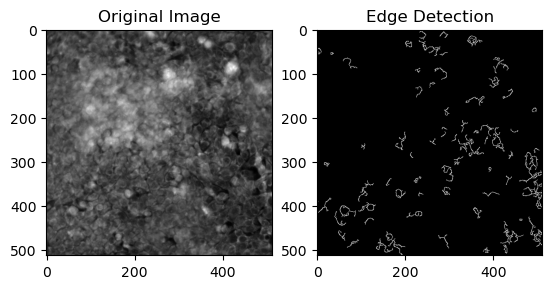

In [28]:
# Edge detection
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('data/train_fixed/HEPG2-01_1_B02_w2.png', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(image, threshold1=30, threshold2=100)

# Display the original and edge-detected images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.show()


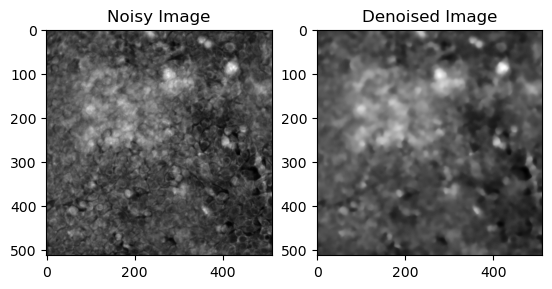

In [23]:
# Image denosing (don't use)
from skimage import io, color, restoration
import matplotlib.pyplot as plt

# Load the noisy image
image_noisy = io.imread('data/train_fixed/HEPG2-01_1_B02_w2.png', as_gray=True)

# Perform denoising using the Wiener filter
image_denoised = restoration.denoise_tv_chambolle(image_noisy, weight=0.1)

# Display the original and denoised images
plt.subplot(121), plt.imshow(image_noisy, cmap='gray'), plt.title('Noisy Image')
plt.subplot(122), plt.imshow(image_denoised, cmap='gray'), plt.title('Denoised Image')
plt.show()


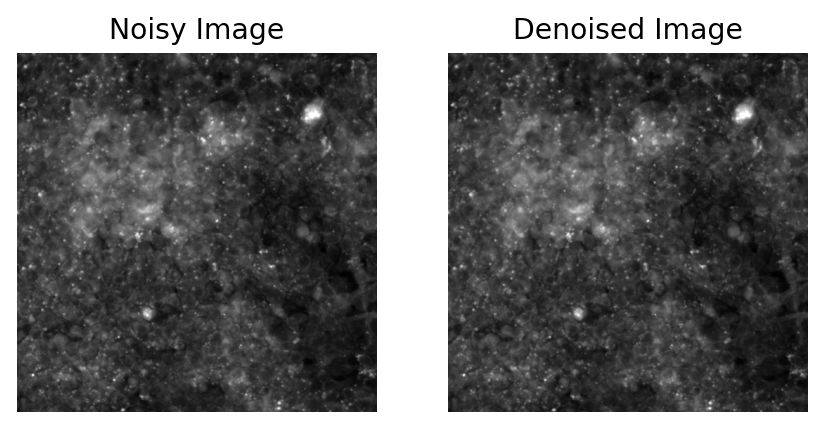

In [44]:
# Normalize
import torchvision.transforms as transforms

# Load the noisy image
image_noisy = io.imread('data/train_fixed/HEPG2-01_1_B02_w3.png', as_gray=True)

image_noisy1 = transforms.ToTensor()(image_noisy)
image_denoised = transforms.Normalize(mean=[0.495], std=[0.299])(image_noisy1)

# Display the original and denoised images
plt.figure(figsize=(6,6), dpi=170)
plt.subplot(121), plt.imshow(image_noisy, cmap='gray'), plt.title('Noisy Image')
plt.axis('off')
plt.subplot(122), plt.imshow(image_denoised[0, :, :], cmap='gray'), plt.title('Denoised Image')
plt.axis('off')
plt.show()



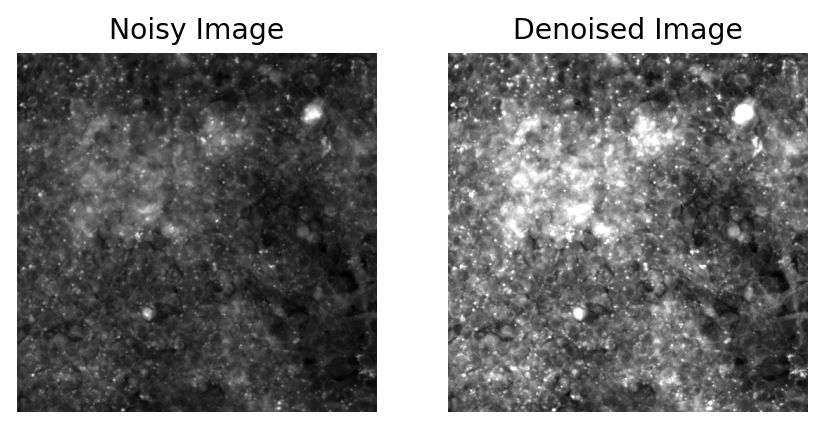

In [46]:
# Color augmentation

# Load the noisy image
image_noisy = io.imread('data/train_fixed/HEPG2-01_1_B02_w3.png', as_gray=True)

image_noisy1 = transforms.ToTensor()(image_noisy)
image_denoised = transforms.ColorJitter(brightness=0.7, contrast=0.3, saturation=0.555, hue=0.95)(image_noisy1)

# Display the original and denoised images
plt.figure(figsize=(6,6), dpi=170)
plt.subplot(121), plt.imshow(image_noisy, cmap='gray'), plt.title('Noisy Image')
plt.axis('off')
plt.subplot(122), plt.imshow(image_denoised[0, :, :], cmap='gray'), plt.title('Denoised Image')
plt.axis('off')
plt.show()




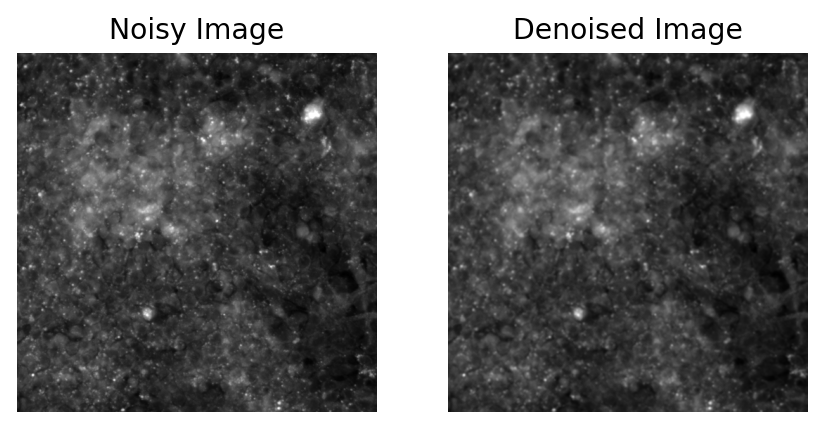

In [47]:
# Gaussian blur

# Load the noisy image
image_noisy = io.imread('data/train_fixed/HEPG2-01_1_B02_w3.png', as_gray=True)

image_noisy1 = transforms.ToTensor()(image_noisy)
image_denoised = transforms.GaussianBlur(kernel_size=3)(image_noisy1)

# Display the original and denoised images
plt.figure(figsize=(6,6), dpi=170)
plt.subplot(121), plt.imshow(image_noisy, cmap='gray'), plt.title('Noisy Image')
plt.axis('off')
plt.subplot(122), plt.imshow(image_denoised[0, :, :], cmap='gray'), plt.title('Denoised Image')
plt.axis('off')
plt.show()

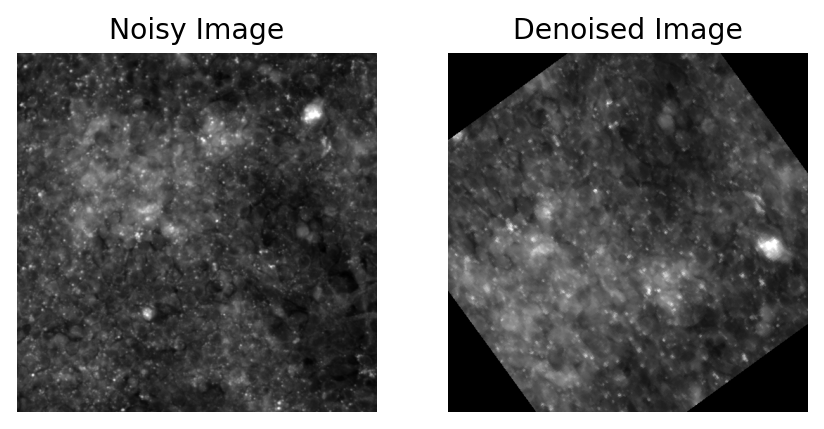

In [57]:
# First place code stuff
import torchvision.transforms as transforms
from PIL import Image

# Load your image (replace 'path_to_image.jpg' with your file path)
image = Image.open('data/train_fixed/HEPG2-01_1_B02_w3.png')

# Define the transformations
transform = transforms.Compose([
    transforms.RandomResizedCrop(size=(512, 512), scale=(0.5, 1.0), interpolation=transforms.InterpolationMode.NEAREST),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=90),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0], std=[1]),
    transforms.RandomApply([
        transforms.ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1)),
    ]),
])

# Apply the transformations to the image
image_denoised = transform(image)

plt.figure(figsize=(6,6), dpi=170)
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Noisy Image')
plt.axis('off')
plt.subplot(122), plt.imshow(image_denoised[0, :, :], cmap='gray'), plt.title('Denoised Image')
plt.axis('off')
plt.show()


In [67]:
# Read in train_with_target_id.csv and see hwo often each target comes up.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/train_with_target_id.csv')
df.head()

well_sirna_counts = df.groupby('well')['sirna'].value_counts().reset_index(name='well_sirna_count')

# Display the result
well_sirna_counts[well_sirna_counts['well'] == 'B03']

,well,sirna,well_sirna_count
1,B03,sirna_1013,2
2,B03,sirna_1048,2
3,B03,sirna_1051,2
4,B03,sirna_1087,2
5,B03,sirna_424,2
...,...,...,...
118,B03,sirna_959,1
119,B03,sirna_98,1
120,B03,sirna_99,1
121,B03,sirna_995,1
